**Load any image**

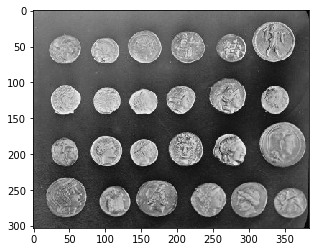

In [4]:
# skimage.data has a lot of sample images to play around with
from skimage import data
import matplotlib.pyplot as plt
image = data.coins()

plt.imshow(image, cmap='gray')
plt.show()

**Import utilities needed for convolution**

In [5]:
from scipy.signal import convolve2d

**Find the 5X5 Guassian Blur kernel with sigma = 1.0 and convolve the above image with that kernel**


*Hint: You can create various Guassian kernel at http://dev.theomader.com/gaussian-kernel-calculator/*

In [6]:
import numpy as np
kernel = np.array([[0.003765,0.015019,0.023792,0.015019,0.003765],
                   [0.015019,0.059912,0.094907,0.059912,0.015019],
                   [0.023792,0.094907,0.150342,0.094907,0.023792],
                   [0.015019,0.059912,0.094907,0.059912,0.015019],
                   [0.003765,0.015019,0.023792,0.015019,0.003765]])

**Convole the guassian kernel with the image and use 'valid' convolution and show the result side by side**

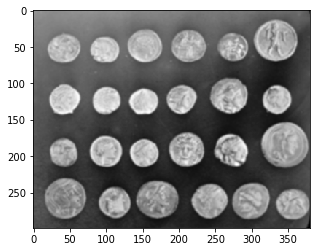

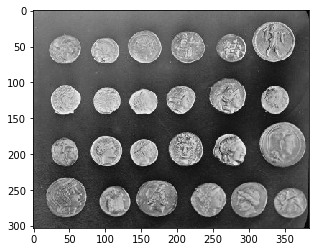

In [8]:
from scipy.signal import convolve2d
blurred_image = convolve2d(image, kernel, mode='valid')
plt.imshow(blurred_image, cmap='gray')
plt.show()
plt.imshow(image, cmap='gray')

<h1>Build a CNN to classify 10 monkey species</h1>

**Mounting Google Drive on to the Google Colab instance**

In [40]:
import tensorflow as tf
images_path = tf.keras.utils.get_file("monkeys_dataset.zip","https://drive.google.com/file/d/10KIy3-HgFLNE3SbkACl5StoPr00TfK4l/view?usp=sharing")


**Set the appropriate path for the datsaet zip provided**

In [41]:
images_path

'/Users/nj1000275242/.keras/datasets/monkeys_dataset.zip'

**Extracting the dataset.zip to the present working directory**

In [48]:
from zipfile import ZipFile
with ZipFile('monkeys_dataset.zip', 'r') as zip:
  zip.extractall()

*Check the list of files in the pwd(present working directory) by running command 'ls' and ensure 'dataset' folder has been generated*

In [49]:
!ls

2_CNN_Basics_MNIST.ipynb          lena.jpg
Practice_Project_SVHN_CNN.ipynb   monkeys_dataset.zip
Working with images.ipynb         practice_exercise_questions.ipynb
dataset


**Build a Sequential CNN classifier with input shape as 64X64 and using three sets of Convoltutional + Pooling layers. You can additionally use Dropout in the fully connected layers. Make sure the final layer shape matches with the number of classes**

In [57]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Conv2D(32,(3, 3), input_shape=(64,64,3), activation="relu", padding="same"))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(32, (3, 3), activation="relu", padding="valid"))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(units=512, activation="relu"))

model.add(Dropout(0.2))

model.add(Dense(units=128, activation="relu"))

model.add(Dropout(0.2))

model.add(Dense(units=10, activation="softmax"))

**Compile the CNN classifier with Adam optimizer (default Learning rate and other parameters)
and Categorical Crossentropy as loss function and Accuracy as the metric to monitor**

*Optionally you can use an optimizer with custom learning rate and passing it to the optimizer parameter of compile*

*Eg: tensorflow.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)*

In [58]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

**Use ImageDataGenerator to create a test and training set data generators and use fit_generator() function to train the model**

*ImageDataGenerator is a powerful preprocessing utility to generate training and 
testing data with common data augmentation techniques. It can also be used to  
generate training data from Images stored in hierarchical directory structures
For more options of ImageDataGenerator go to https://keras.io/preprocessing/image/*

In [62]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                    shear_range = 0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)

train_set = train_datagen.flow_from_directory("./dataset/train",
                                                target_size=(64,64),
                                                batch_size=32,
                                                class_mode="categorical")


test_set = train_datagen.flow_from_directory("./dataset/test",
                                                target_size=(64,64),
                                                batch_size=32,
                                                class_mode="categorical")



Found 1098 images belonging to 10 classes.
Found 272 images belonging to 10 classes.


In [64]:
model.fit_generator(train_set, steps_per_epoch=int(1098/32), epochs=1, validation_data=test_set, validation_steps=int(272/32))

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 34 steps, validate for 8 steps
34/34 [==============================] - 28s 837ms/step - loss: 2.3062 - accuracy: 0.1041 - val_loss: 2.2670 - val_accuracy: 0.1016


**save the model and its weights**

In [65]:
model.save("./classifier.h5")
model.save_weights("./classifier_weights.h5")

*Check the current directory if the weights have been saved*

In [66]:
!ls 

2_CNN_Basics_MNIST.ipynb          dataset
Practice_Project_SVHN_CNN.ipynb   lena.jpg
Working with images.ipynb         monkeys_dataset.zip
classifier.h5                     practice_exercise_questions.ipynb
classifier_weights.h5


<h2>Testing the model</h2>

**Load the pre-trained saved model and load the weights**

In [67]:
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras.preprocessing import image

# Load the pre trained model from the HDF5 file saved previously
pretrained_model = load_model('./classifier.h5')
pretrained_model.load_weights('./classifier_weights.h5')

**Test the model on one single image from the test folders**

In [81]:
import cv2
test_image = cv2.imread('./dataset/test/n0/n000.jpg')

print(test_image.shape)

test_image = cv2.resize(test_image, (64, 64))
print(test_image.shape)

test_image = np.expand_dims(test_image, axis=0)

test_image = test_image * 1/255

print('After expand_dims: '+ str(test_image.shape))

result = model.predict(test_image)

classes_dict = train_set.class_indices
print(classes_dict)

prediction_class = []
for class_name, index in classes_dict.items():
   prediction_class.append(class_name)

print(result[0])

predicted_index = np.argmax(result[0])
print(prediction_class[predicted_index])

(331, 500, 3)
(64, 64, 3)
After expand_dims: (1, 64, 64, 3)
{'n0': 0, 'n1': 1, 'n2': 2, 'n3': 3, 'n4': 4, 'n5': 5, 'n6': 6, 'n7': 7, 'n8': 8, 'n9': 9}
[0.11129358 0.08213011 0.09259295 0.11755578 0.08268146 0.14446087
 0.08117242 0.10594837 0.07305401 0.10911047]
n5


**Play around with the model by adding regularization to the layers, adding more convolutional layers, etc., to improve the testing accuracy**